*This notebook was created by Skylar Miller and Ellis Hartley*

# Assumptions

- Domestic company only interested in domestic gross revenue (for seasonality consistency). According to gizmodo{source link here}, "generally, domestic revenue seems to be be better for studios than overseas revenue, because the studios take a bigger cut of domestic revenue."
- School is out in the US during June, July, and most of December. 


# Question 

Does the season of release affect the revenue of a movie?

# Backround 

We think that the summer months will perform the best because students are out of school and families will be looking for ways to entertain. In addition, with heat waves in full effect, in activities are preferred. 

### Null Hypothesis: There is no difference between summer month revenue and other month revenues. 
 
### Alternative Hypothesis: There is more summer month revenue than other month revenues.

# Data Exploration
- Opening all of the available data sources, we decided to go with The Numbers Dataset because it is the only one that contains the information that we are interested in. More info on this dataset can be found here: https://www.the-numbers.com/

In [1]:
import pandas as pd
df_bom = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
df_bom.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [2]:
df_tmbd = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
df_tmbd.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [3]:
df_tn = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
df_tn.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [4]:
df_rt_info = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
df_rt_info.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


In [5]:
df_rt_reviews = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ansi')
df_rt_reviews.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


# Our analysis starts here
------------------------------------------------------------------------------------
# ETL

In [6]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


As shown above, this dataset consists of 5782 rows with no Null values. 

In [7]:
def clean_dollar(df, column):
    df[column] = df[column].str.strip('$')
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype(int)
    return df[column]

clean_dollar(df_tn,'production_budget') 
clean_dollar(df_tn,'domestic_gross')
clean_dollar(df_tn,'worldwide_gross')

OverflowError: Python int too large to convert to C long

In [8]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [9]:
# Create a new row called 'seasons' that categorizes the dates columns by season. Seasons are as follows:

# summer = june 21 - sept 22 (06/21-09/22) # summer months = 6,7,8
# fall = sept 23 - dec 20 (09/23-12/20) # fall months = 9,10,11
# winter = dec 21 - mar 18 (12/21-03/18) # winter months = 12,1,2
# spring = mar 19 - jun 20 (03/19-06/20) # spring months = 3,4,5

summer = ('Jun', 'Jul', 'Aug')
fall = ('Sep', 'Oct', 'Nov')
winter = ('Dec', 'Jan', 'Feb')
spring = ('Mar', 'Apr', 'May')

def f(row):
    if row['release_date'].startswith(summer):
        val = 'Summer'
    elif row['release_date'].startswith(fall):
        val = 'Fall'
    elif row['release_date'].startswith(winter):
        val = 'Winter'
    else:
        val = 'Spring'
    return val

df_tn['seasons'] = df_tn.apply(f, axis=1)

In [10]:
df_tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Spring
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,Spring
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Fall
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Fall


In [11]:
df_tn.sort_values(by=['domestic_gross'], ascending=True).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
3231,32,"Dec 31, 2008",Ca$h,13700000,0,11738256,Winter
4762,63,"Dec 31, 2009",Chicago Overcoat,3000000,0,0,Winter
4763,64,"Sep 13, 2011",Never Back Down 2: The Beatdown,3000000,0,0,Fall
4764,65,"Dec 31, 2015",AWOL-72,3000000,0,0,Winter
4194,95,"May 10, 2011",The Hit List,6000000,0,0,Spring
4765,66,"Jan 15, 2013",30 Nights Of Paranormal Activity With The Devi...,3000000,0,0,Winter
4766,67,"Feb 6, 2015",Enter the Dangerous Mind,3000000,0,0,Winter
5207,8,"Dec 31, 2013",The Vatican Exorcisms,1100000,0,0,Winter
5206,7,"Dec 31, 2010",The Dead Undead,1100000,0,0,Winter
5205,6,"Apr 7, 2015",Silent Running,1100000,0,0,Spring


In [12]:
df_tn.sort_values(by=['domestic_gross'], ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Winter
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Spring
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Winter
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Summer
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,Summer
74,75,"Jul 18, 2008",The Dark Knight,185000000,533720947,1001996207,Summer


It looks like there are a lot of movies with 0 domestic gross revenue. Since we are only interested in domestic, we are going to drop those movies from our dataset. Below we see there are 548 rows to drop.

In [13]:
df_zeros = df_tn[df_tn['domestic_gross']==0]
print(len(df_zeros))
df_zeros

548


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,Winter
479,80,"Dec 13, 2017",Bright,90000000,0,0,Winter
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,Winter
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,Winter
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,Winter
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,Winter
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,Winter
5771,72,"May 19, 2015",Family Motocross,10000,0,0,Spring
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Winter


In [14]:
df = df_tn.drop(df_tn[df_tn['domestic_gross']==0].index)

df.sort_values(by=['domestic_gross'], ascending=False).head(3000)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Winter
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Spring
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Winter
...,...,...,...,...,...,...,...
2618,19,"Jul 21, 2000",Loser,20000000,15464026,18250106,Summer
1231,32,"Jul 13, 2016",The Infiltrator,47500000,15436808,20718104,Summer
2953,54,"Mar 3, 2000",Drowning Mona,16000000,15427192,15980376,Spring
3617,18,"May 30, 2003",Wrong Turn,10000000,15417771,28649556,Spring


We probably want to do something with these low grossing films. A quick google search on "Ed and his Dead Mother" shows a few well-known actors so these numbers are probably incorrect. 

In [15]:
df.describe()

,id,production_budget,domestic_gross
count,5234.000000,5.234000e+03,5.234000e+03
mean,50.346580,3.403348e+07,4.625747e+07
std,28.848667,4.296048e+07,7.029651e+07
min,1.000000,1.100000e+03,3.880000e+02
25%,25.000000,6.500000e+06,4.289718e+06
50%,50.000000,2.000000e+07,2.198422e+07
75%,75.000000,4.500000e+07,5.756598e+07
max,100.000000,4.250000e+08,9.366622e+08


In [16]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2a5194040>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2a5194730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2a517dca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2a5194df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2a71a0190>],
 'means': []}

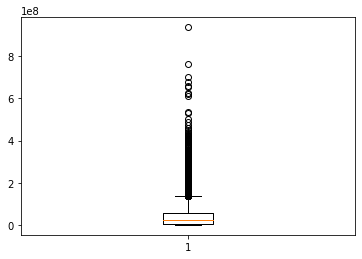

In [17]:
plt.boxplot(df['domestic_gross'])

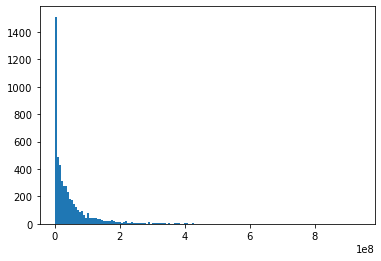

In [18]:
plt.hist(df['domestic_gross'], bins='auto')
plt.show()

In [19]:
df['domestic_gross'].median()

21984222.5

Our distribution is highly skewed, with the majority of the movies grossing under 1 million in revenue. Since we are only interested in successful movies, we are going to filter our dataset to only include "above average" movies. Also, since the movie industry has changed over the years, we are also going to only include movies created after 2010. 

In [20]:
average_dom_gross = df['domestic_gross'].mean()
print(average_dom_gross)
cutoff_year = 2010

46257465.79002675


In [21]:
import datetime as datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
...,...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644,Spring
5776,77,2004-12-31,The Mongol King,7000,900,900,Winter
5778,79,1999-04-02,Following,6000,48482,240495,Spring
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,Summer


In [22]:
df_filtered = df[(df['domestic_gross'] > average_dom_gross) & (df['release_date'].dt.year >= cutoff_year)]
df_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring
...,...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581,Summer
4668,69,2012-10-12,Sinister,3000000,48086903,87727807,Fall
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,Spring
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,Spring


We have 614 movies in our dataset. At this point, we are ready for our analysis.

# Data Analysis

In this section, we plot out the following:

- Count of movies by season
- Total revenue by season
- Average revenue by season

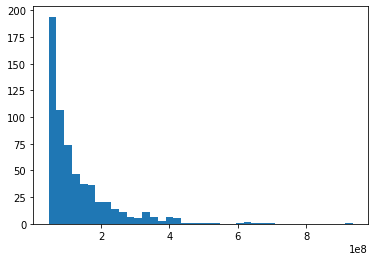

In [23]:
plt.hist(df_filtered['domestic_gross'], bins='auto')
plt.show()

<AxesSubplot:xlabel='seasons'>

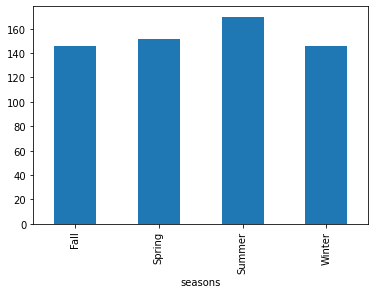

In [24]:
# plotting count of movies by season
 
    
df_filtered.groupby('seasons')['movie'].count().plot(kind='bar')

<AxesSubplot:xlabel='seasons'>

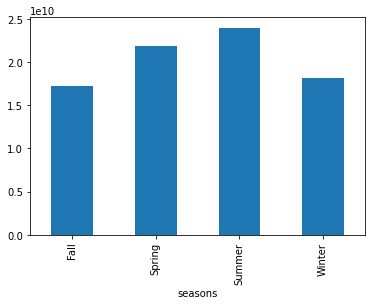

In [25]:
# plotting sum of gross revenue generated from movies by season

df_filtered.groupby('seasons')['domestic_gross'].sum().plot(kind='bar')

<AxesSubplot:xlabel='seasons'>

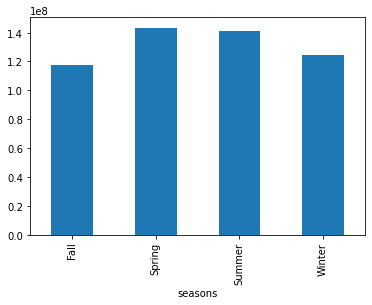

In [26]:
# plotting average of gross revenue generated from movies by season

df_filtered.groupby('seasons')['domestic_gross'].mean().plot(kind='bar')

In [27]:
df_filtered['month'] = df_filtered['release_date'].dt.month

df_filtered

<ipython-input-27-5e9d12c803db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['release_date'].dt.month


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons,month
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,5
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,12
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,4
...,...,...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581,Summer,6
4668,69,2012-10-12,Sinister,3000000,48086903,87727807,Fall,10
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,Spring,4
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,Spring,3


In [30]:
df_filtered['net_revenue'] = df_filtered['worldwide_gross'].astype(int) - df_filtered['production_budget']
df_filtered

<ipython-input-30-7f45004f86ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['net_revenue'] = df_filtered['worldwide_gross'].astype(int) - df_filtered['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons,month,domestic_net,net_revenue
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,5,635063875,635063875
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,5,1072413963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,12,999721747,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,12,1747311220,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,4,1748134200,1748134200
...,...,...,...,...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581,Summer,6,88266581,88266581
4668,69,2012-10-12,Sinister,3000000,48086903,87727807,Fall,10,84727807,84727807
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,Spring,4,98370886,98370886
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,Spring,3,62627092,62627092


<AxesSubplot:xlabel='month'>

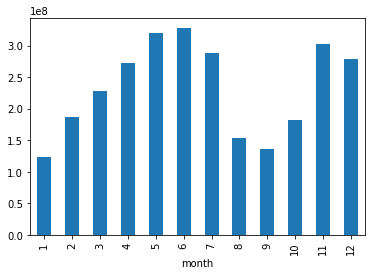

In [31]:
df_filtered.groupby('month')['net_revenue'].mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

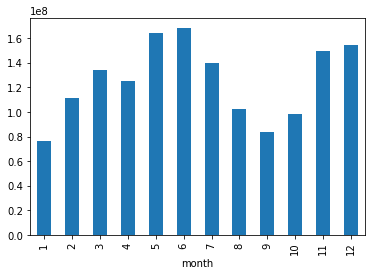

In [29]:
df_filtered.groupby('month')['domestic_gross'].mean().plot(kind='bar')

In [ ]:
df_filtered.groupby('month')['domestic_gross'].count().plot(kind='bar')

In [ ]:
df_filtered.groupby('month')['domestic_gross'].sum().plot(kind='bar')

In [44]:
summer_df = df_filtered[df_filtered['seasons']=='Summer']
print(f"mean: {summer_df['domestic_gross'].mean().astype(int)}; number of movies: {len(summer_df)}")

mean: 141080559; number of movies: 170


In [33]:
summer_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons,month,domestic_net,net_revenue
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Summer,7,809439099,809439099
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Summer,7,-14997885,-14997885
28,29,2013-06-14,Man of Steel,225000000,291045518,667999518,Summer,6,442999518,442999518
30,31,2012-07-03,The Amazing Spider-Man,220000000,262030663,757890267,Summer,7,537890267,537890267
32,33,2017-06-21,Transformers: The Last Knight,217000000,130168683,602893340,Summer,6,385893340,385893340


In [45]:
# other_seasons_df = df_filtered[(df_filtered['seasons']=='Spring') |
#                                (df_filtered['seasons']=='Winter') |
#                                (df_filtered['seasons']=='Fall')]
# other_seasons_df['domestic_gross'].mean()

In [46]:
# other_seasons_df.head()

In [50]:
import scipy.stats as stats
from math import sqrt
import numpy as np
from numbers import Number

# Population mean
mu_0 = df_filtered['domestic_gross'].mean()

# Population standard deviation
sigma = df_filtered['domestic_gross'].std()

# Mean gross revenue of summer sample
x_bar = summer_df['domestic_gross'].mean()

# std gross revenue of summer sample
x_std = summer_df['domestic_gross'].std()

# Number of movies in the whole population
n = len(df_filtered)

# Number of movies in the sample
n_sample = len(summer_df)

# Alpha (1 - confidence level)
alpha = 0.05
print(sigma)

107297897.91223817


Because this is a skewed (non-normal) distribution, we think the appropriate test is chi-squared. 